# Prediction of Purchase Patterns

We have been tasked to predict whether a certain customer entering a store
will end up making a purchase or not. The data has anonymized features of categorical and numeric nature. Let's find out if we can make sense of this!

In [1]:
# Import some basic python libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/JohanLg/Documents/My Documents/Schema_Dagliga_Uppgifter/Python Projects'

In [3]:
os.chdir('/Users/JohanLg/Documents/My Documents/ESCP/Kurser/Vår/Python')

In [4]:
data = pd.read_csv('train (2).csv')

From here, there are multiple aspects i'd like to dig deeper into. These steps can be broken down into

1.Data Preprocessing:
    
a. Are there missing values in the data? Might this affect my results?
b. How is the distribution of my numeric variables? Do they have outliers? 
c. Dummify the categorical variables.
d. Is the 'label'-class, our dependant variable, balanced? If not, which sampling-technique should I use?
           
2.Feature Selection:
    
a. Which variables seem to drive 'label'? Can I think of any varibles
that are missing to avoid omitted-variable bias?
b. How are the variables correlated? Can I drop some varibles to avoid
multi-collinearity?
           
3.Parameter Optimisation:
        
a. Use GridSearch to optimise models.
        
4.Evaluating Model:
       
a. Cross-Validating the results.
b. Using ROC-AUC analysis to evaluate.


In [5]:
print(data.shape)

(31428, 27)


In [6]:
# Let's have a quick glance at the data

data.head(6)

# We know that label is our dependant variable, where -1 indicates no purchase
# and 1 the opposite. 


,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646
5,-1,187,19274374,-1,0,3302106226,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,3182036626,2379633508,1284343215


# Data Preprocessing

## 1.1 Missing Values

In [7]:
null = data.isnull()
null.sum()/len(data)

#No missing Values. Great!

label           0.0
id              0.0
visitTime       0.0
purchaseTime    0.0
hour            0.0
C1              0.0
C2              0.0
C3              0.0
C4              0.0
C5              0.0
C6              0.0
C7              0.0
C8              0.0
N1              0.0
C9              0.0
N2              0.0
N3              0.0
N4              0.0
N5              0.0
N6              0.0
N7              0.0
N8              0.0
N9              0.0
N10             0.0
C10             0.0
C11             0.0
C12             0.0
dtype: float64

## 1.2 Distributions

Lets run a for-loop to plot out our numeric variables.

 Var 0  


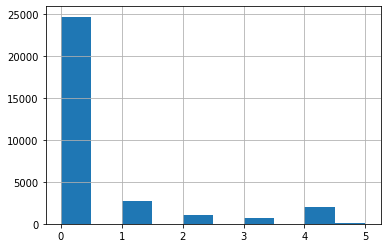

 Var 1  


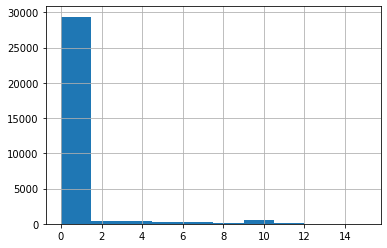

 Var 2  


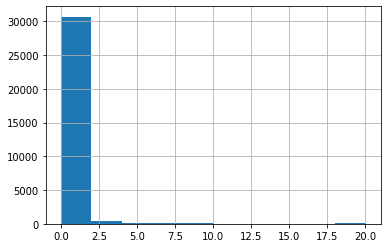

 Var 3  


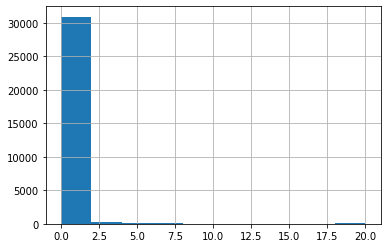

 Var 4  


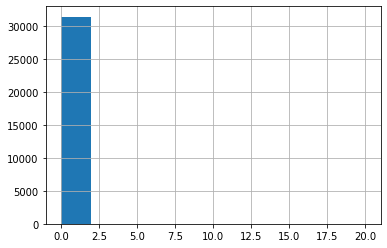

In [8]:
Numerical_Var = data.loc[:,data.columns.str.startswith('N')]


for i in range(0, 5):
    Numerical_Var.iloc[:,i].hist()
    print(" Var %s  " %i)
    plt.show()


We can see that most variables are heavily imbalanced. 
Our solution for this will be normalising using the StandardScaler()

In [9]:
X = data.iloc[:, (data.columns!='label') & (data.columns!='visitTime') ]
Y = data['label']

In [10]:
# Normalizing numeric data

for i in Numerical_Var:
    x= X[[i]].values
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    X[i]=x_scaled
    

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [11]:
X.head()

,id,purchaseTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,37,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,3624739744,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,419316267,3617851689,4220791646
1,55,-1,0,3191875643,403381353,1238330876,652481754,2967512603,179712055,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,0.183475,-0.041971,-0.049696,1968545380,3831440054,1213938795
2,114,-1,0,2634604934,403381353,1928325921,652481754,2967512603,1607619193,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,1405802835,2379633508,1284343215
3,128,-1,0,2569487005,403381353,296915027,652481754,2967512603,10212495,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,2299319102,3617851689,4220791646
4,164,-1,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,1306075469,3617851689,4220791646


In [12]:
Categorical_Var = data.loc[:,data.columns.str.startswith('C')]
Cat = pd.get_dummies(Categorical_Var)

In [13]:
Cat.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,2569487005,1830830742,4228834423,652481754,2967512603,3624739744,2303407174,2206061889,4287642944,419316267,3617851689,4220791646
1,3191875643,403381353,1238330876,652481754,2967512603,179712055,2303407174,157533148,3272771221,1968545380,3831440054,1213938795
2,2634604934,403381353,1928325921,652481754,2967512603,1607619193,2303407174,3588031319,3329757940,1405802835,2379633508,1284343215
3,2569487005,403381353,296915027,652481754,2967512603,10212495,2303407174,3588031319,3427046189,2299319102,3617851689,4220791646
4,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,157533148,2088887026,1306075469,3617851689,4220791646


## 1.3 Balance of dependant variable

Lets first show the independant variable:

In [14]:
data.label.value_counts()

# Heavily imbalanced. Yikes
# Now time for solutions!


-1    31371
 1       57
Name: label, dtype: int64

After counting our independant variable, we can see that some kind of over/undersampling needs to be made. Imbalanced classes lead to skewed results in ML-projects as the model will tend to classify every observations as the overbalanced class.

In [15]:

X=data.drop(["label","purchaseTime",'id'], axis=1)
y=data['label']

Start by defining dependant/independant variables. 
Drop those that are unique or provide no value (purchasetime
only being shown when a purchase happens)

## NAIVE RESAMPLING , SMOTE

We will test two differenct sampling methods, Naive and SMOTE. Naive resampling consists of simply randomly drawing observations from the original dataset from the underbalanced class. This has the downside of not adding new information to the model and therefore giving unreliable results.

SMOTE is a sofisticated algorithm which, in the words of Jason Brownlee, "...works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line." we will use both to illustrate. 

In [16]:
from imblearn.over_sampling import RandomOverSampler


Using TensorFlow backend.


In [17]:
#import sys
#!{sys.executable} -m pip install -U imbalanced-learn --ignore-installed scikit-learn 

In [17]:
from imblearn.over_sampling import SMOTE, ADASYN

### Oversample and then re-shuffle naively

In [18]:
ros = RandomOverSampler(random_state=1, sampling_strategy=0.4)

# We oversample the minority class

In [19]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [20]:
y_resampled.value_counts()

# Class rebalanced to equal occurances 

-1    31371
 1    12548
Name: label, dtype: int64

### SMOTE

In [21]:
X_resampledSMOTE, y_resampledSMOTE = SMOTE(random_state=1, sampling_strategy=0.4).fit_resample(X, y)

In [22]:
y_resampledSMOTE.value_counts()

-1    31371
 1    12548
Name: label, dtype: int64

Our classes out now more balanced! To replicate the idea of imbalance, I choose not to oversample equally for the classes to have an equal amounts of observations. From this point on, the SMOTE sampled data will be used. Also, to keep the features of the data, the selection process will be done on the original verison. This is due to violation of the assumption of independant observations whilst doing selection on oversamled data. 

# 2. Feature selection

## 2.1 Correlation analysis

Now that we have some 'clean' data, let's find some insights

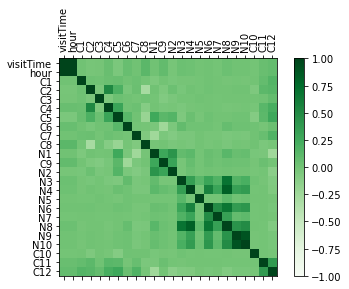

In [23]:
corr = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Greens', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

Visittime and Hour correlate highly. They represent more/less
the same thing. Also, N9 and N10 will correlate. One of each will
therefore be dropped to avoid multicollinearity.


In [24]:
X1=X.drop(['hour','N9','visitTime'], axis=1)

## 2.2 Feature selection with Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

Raandom Forest is a model that can be used for predicting and analysing variable importance. It calculates entropy in variables (how much randomness they add/substract from the independant variable) and can be used for feature selection. 

In [26]:
rf = RandomForestClassifier(n_estimators = 100).fit(X1, y)

In [27]:
rf.feature_importances_

array([0.07153532, 0.01997176, 0.0503817 , 0.01362421, 0.00899585,
       0.04863186, 0.03197453, 0.02876365, 0.03281724, 0.03485071,
       0.01077789, 0.03137342, 0.02933668, 0.00540381, 0.11469911,
       0.00979705, 0.06157969, 0.22179046, 0.12743491, 0.01798438,
       0.02827577])

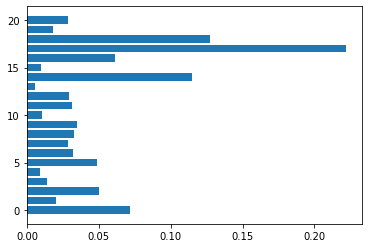

In [28]:
plt.barh(range(21), rf.feature_importances_)
plt.show(range(21))

In [29]:
imp_var = rf.feature_importances_ > 0.04
# Extract variables with gini > 0.1

In [30]:
imp1 = imp_var.tolist()

In [31]:
res = [i for i, val in enumerate(imp1) if val] 

In [32]:
X_resampledSMOTE.iloc[:,res].head(6)

,visitTime,C1,C4,N4,N6,N7,N8
0,19274330,2569487005,652481754,0,0,0,0
1,19274334,3191875643,652481754,0,0,0,1
2,19274353,2634604934,652481754,0,0,0,0
3,19274358,2569487005,652481754,0,0,0,0
4,19274367,2569487005,652481754,0,0,0,0
5,19274374,3302106226,652481754,0,0,0,0


This is one way to decide which variables to be used to train model. There are more sofistocated techniques tough, like LASSO and Ridge regression, that supposedely choose the optimal variables t obe used (our previous approach of just choosing gini > 1 is less 'academic'). Ridge will be tested aswell. 

## 2.3 Feature Selection part 2 & Paremeter Optimization : Using GridSearchCV 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline as pipe

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42,stratify = y)

In [35]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

In [36]:
clf = RandomForestClassifier(random_state = 42, class_weight="balanced")

rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')

rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
features=list(X_train.columns[rfecv.support_])

Optimal number of features : 13


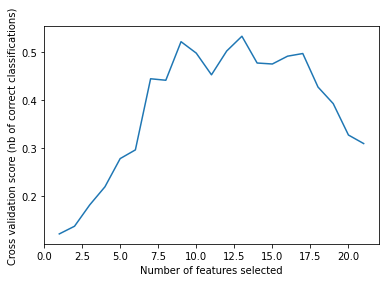

In [37]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
features

['C1',
 'C3',
 'C6',
 'C8',
 'N1',
 'C9',
 'N3',
 'N4',
 'N6',
 'N8',
 'N10',
 'C10',
 'C12']

It seems that the feature selecton with RFECV is very similar to our 'best-gini' selection. 

In [39]:
param_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [40]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, scoring = 'f1')

In [41]:
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 300}


Now we both have the best feature selection and parameters (for a Random Forest)

In [42]:
from sklearn.metrics import classification_report

y_true, y_pred = y_test, CV_rfc.predict(X_test)
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      7852
           1       0.36      1.00      0.53         5

    accuracy                           1.00      7857
   macro avg       0.68      1.00      0.76      7857
weighted avg       1.00      1.00      1.00      7857



In [43]:
CV_rfc.best_score_

0.3802486402486402

In [44]:
best_rfc = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators = 300) 

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
scores = cross_val_score(best_rfc, X_train, y_train, cv = 10, scoring ='f1_macro')

In [69]:
np.mean(scores)

0.7174592027096717

## 4. Evaluating model

Now that we've founde both the opimal combination of features and parameters, let's use them in modelling! This time, we will train on the over sampled data.

With random forest we have been able to find which variables have
the strongest influence on our data. These will be the final features we use 
in our prediction model

In [54]:
Final_Data = X_resampledSMOTE.loc[:,features]
Y = y_resampledSMOTE

In [55]:
Final_Data.head()

,C1,C3,C6,C8,N1,C9,N3,N4,N6,N8,N10,C10,C12
0,2569487005,4228834423,3624739744,2206061889,0,4287642944,0,0,0,0,0,419316267,4220791646
1,3191875643,1238330876,179712055,157533148,1,3272771221,1,0,0,1,0,1968545380,1213938795
2,2634604934,1928325921,1607619193,3588031319,0,3329757940,0,0,0,0,0,1405802835,1284343215
3,2569487005,296915027,10212495,3588031319,0,3427046189,0,0,0,0,0,2299319102,4220791646
4,2569487005,681762206,580883881,157533148,0,2088887026,0,0,0,0,0,1306075469,4220791646


### Train Test splitting with SMOTE

In [56]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(
 Final_Data, Y, test_size=0.33, random_state=42)

In [57]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Cross Validation

### Random Forest on SMOTE 

In [60]:
from sklearn.model_selection import cross_validate

In [66]:
best_rfc = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators = 300) 

In [67]:
res = cross_validate(best_rfc, X_trainS, y_trainS , return_train_score = True, cv = 5, scoring=["f1"] )

In [68]:
res_df=pd.DataFrame(res)
res_df

,fit_time,score_time,test_f1,train_f1
0,6.936625,0.196540,0.997335,1.0
1,7.040402,0.185194,0.997330,1.0
2,6.877553,0.194564,0.997038,1.0
3,6.839117,0.198679,0.996148,1.0
4,6.729044,0.181367,0.996443,1.0


In [80]:
best_rfc.fit(X_trainS, y_trainS)
predictionsRF = best_rfc.predict(X_testS)

## XGBOOST

In [69]:
import xgboost as xgb

In [71]:
model = xgb.XGBClassifier(max_depth=1)
eval_set = [(X_trainS, y_trainS), (X_testS, y_testS)]
model.fit(X_trainS, y_trainS, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
predictionsXG = model.predict(X_testS)

[0]	validation_0-error:0.040306	validation_0-logloss:0.612791	validation_1-error:0.0425	validation_1-logloss:0.613214
[1]	validation_0-error:0.040306	validation_0-logloss:0.547087	validation_1-error:0.0425	validation_1-logloss:0.547891
[2]	validation_0-error:0.040306	validation_0-logloss:0.492536	validation_1-error:0.0425	validation_1-logloss:0.49369
[3]	validation_0-error:0.040306	validation_0-logloss:0.446726	validation_1-error:0.0425	validation_1-logloss:0.448206
[4]	validation_0-error:0.040306	validation_0-logloss:0.407194	validation_1-error:0.0425	validation_1-logloss:0.408806
[5]	validation_0-error:0.040306	validation_0-logloss:0.373518	validation_1-error:0.0425	validation_1-logloss:0.375426
[6]	validation_0-error:0.040306	validation_0-logloss:0.344007	validation_1-error:0.0425	validation_1-logloss:0.346041
[7]	validation_0-error:0.040306	validation_0-logloss:0.318675	validation_1-error:0.0425	validation_1-logloss:0.320828
[8]	validation_0-error:0.040306	validation_0-logloss:0.29

[69]	validation_0-error:0.039048	validation_0-logloss:0.106879	validation_1-error:0.040982	validation_1-logloss:0.109965
[70]	validation_0-error:0.038811	validation_0-logloss:0.106395	validation_1-error:0.040844	validation_1-logloss:0.109412
[71]	validation_0-error:0.038811	validation_0-logloss:0.105925	validation_1-error:0.040775	validation_1-logloss:0.108868
[72]	validation_0-error:0.038777	validation_0-logloss:0.10545	validation_1-error:0.040775	validation_1-logloss:0.108451
[73]	validation_0-error:0.038845	validation_0-logloss:0.104996	validation_1-error:0.040707	validation_1-logloss:0.10799
[74]	validation_0-error:0.038777	validation_0-logloss:0.104538	validation_1-error:0.040707	validation_1-logloss:0.107507
[75]	validation_0-error:0.033169	validation_0-logloss:0.104099	validation_1-error:0.033393	validation_1-logloss:0.107021
[76]	validation_0-error:0.032931	validation_0-logloss:0.103679	validation_1-error:0.033255	validation_1-logloss:0.106636
[77]	validation_0-error:0.032795	v

# Logistic Regression

In [74]:
logmodel=LogisticRegression()
logmodel.fit(X_trainS,y_trainS)
predictionsLR = logmodel.predict(X_testS)

# Prediction and Classifications

Next step is to compare the performance of our models RandomForest, Logistic Regression and XGBOOST

In [79]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve

In [91]:
print("Evaluation of Optimised Random Forest")
print("\n")
print(classification_report(y_testS,predictionsRF))

# Too high values to seem normal. Could be Overfitted

Evaluation of Optimised Random Forest


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10374
           1       1.00      1.00      1.00      4120

    accuracy                           1.00     14494
   macro avg       1.00      1.00      1.00     14494
weighted avg       1.00      1.00      1.00     14494



In [92]:
print("Evaluation of XGBoost")
print("\n")
print(classification_report(y_testS,predictionsXG))
# only 1 observation wrongly classified

Evaluation of XGBoost


              precision    recall  f1-score   support

          -1       0.97      0.99      0.98     10374
           1       0.97      0.92      0.94      4120

    accuracy                           0.97     14494
   macro avg       0.97      0.95      0.96     14494
weighted avg       0.97      0.97      0.97     14494



In [94]:
print("Evaluation of Logistic Regression")
print("\n")
print(classification_report(y_testS,predictionsLR))

Evaluation of Logistic Regression


              precision    recall  f1-score   support

          -1       0.79      0.89      0.83     10374
           1       0.58      0.40      0.48      4120

    accuracy                           0.75     14494
   macro avg       0.69      0.64      0.66     14494
weighted avg       0.73      0.75      0.73     14494



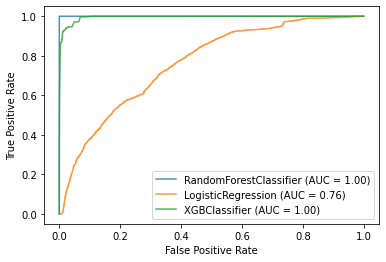

In [95]:
ax = plt.gca()
rf_roc = plot_roc_curve(best_rfc, X_testS, y_testS,ax=ax, alpha=0.8)
lr_roc = plot_roc_curve(logmodel, X_testS, y_testS,ax=ax, alpha=0.8)
xg_roc = plot_roc_curve(model, X_testS, y_testS,ax=ax, alpha=0.8)
plt.show()

# We see the decision tree-based models are more accurate

After this excersise, we can see that optimising the parameters and selection yields results. The random forest is close to perfectrion (even with cross validation as we showed previously). XGBoost is almost as powerful, because it's can be interpreted as an version of Random Forest that "already optimises" it'
s features. 

# Final Fitting

In [96]:
test=pd.read_csv('test1Final.csv')

In [98]:
X=test.loc[:,features]
y=test['label']

In [290]:
Y_pred = best_rfc.predict_proba(X)
Ypred = pd.DataFrame(Y_pred)
test1 = test.id

In [296]:
Final_Pred = pd.concat([test1.reset_index(drop=True), Ypred.iloc[:,1].reset_index(drop=True)], axis=1)

In [298]:
Final_Pred.to_csv('/Users/JohanLg/Documents/My Documents/ESCP/Kurser/Vår/Python/Assignment_23_e197443.csv')